<a href="https://colab.research.google.com/github/Lococo231/MO_Tasks/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install pandas seaborn scikit-learn

# Домашнее задание 4

1. Преобразовать датасет (процессинг категориальных признаков, копия данных в df_not_processed, scale датасета)
2. Сделать k-means кластеризацию (записать cluster в df_not_processed, вывести статистику, графики. попробовать объяснить принцип кластеризации), оценить метриками, вывести результат
3. Подобрать оптимальное число кластеров с помощью "метод локтя", вывести статистику, графики, метрики, объяснить результат
4. Сделать DBSSCAN кластеризацию, подобрать оптимальные параметры, посчитать метрики, вывести статистику, объяснить результат
5. Ответить на вопрос - какой из методов кластеризации больше подходит для вашего датасета

In [10]:
...

Ellipsis

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

df = pd.read_csv('dataset.csv')

# Сохраняем копию исходных данных
df_not_processed = df.copy()

# Форматируем Blood Pressure (126/83 -> категории)
df['Blood Pressure'] = df['Blood Pressure'].str.split('/').str[0].astype(int)

def categorize_bp(bp):
    if bp < 120:
        return 'Low'
    elif bp <= 140:
        return 'Normal'
    else:
        return 'High'

df['Blood Pressure'] = df['Blood Pressure'].apply(categorize_bp)

# Преобразуем Sleep Disorder в числовые коды
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')
df['Sleep Disorder'] = df['Sleep Disorder'].map({
    'Insomnia': 2,
    'Sleep Apnea': 1,
    'None': 0
})

# Определяем категориальные колонки (без Sleep Disorder)
category_columns = [col for col in df.select_dtypes(include=['object']).columns
                    if col != 'Sleep Disorder']

# OneHotEncoding
df = pd.get_dummies(df, columns=category_columns, drop_first=True)

# числовые колонки
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Инициализируем scaler и применяем нормализацию
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_features])

print(f"Исходная форма: {df_not_processed.shape}")
print(f"После процессинга: {df.shape}")
print(f"Колонки: {df.columns.tolist()}")
print(df.head())




Исходная форма: (374, 13)
После процессинга: (374, 25)
Колонки: ['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Sleep Disorder', 'Gender_Male', 'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse', 'Occupation_Sales Representative', 'Occupation_Salesperson', 'Occupation_Scientist', 'Occupation_Software Engineer', 'Occupation_Teacher', 'BMI Category_Normal Weight', 'BMI Category_Obese', 'BMI Category_Overweight', 'Blood Pressure_Low', 'Blood Pressure_Normal']
   Person ID  Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0          1   27             6.1                 6                       42   
1          2   28             6.2                 6                       60   
2          3   28             6.2                 6                       60   
3          4   28             5.9                 4                       30   


In [17]:
# k means
# Применяем K-means (k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Записываем кластеры в исходный df
df_not_processed['Cluster'] = clusters

print("РАСПРЕДЕЛЕНИЕ ПО КЛАСТЕРАМ:")
print(df_not_processed['Cluster'].value_counts().sort_index())

print("\n")
print("МЕТРИКИ КАЧЕСТВА КЛАСТЕРИЗАЦИИ")
silhouette = silhouette_score(X_scaled, clusters)
davies_bouldin = davies_bouldin_score(X_scaled, clusters)
calinski_harabasz = calinski_harabasz_score(X_scaled, clusters)

print(f"Silhouette Score (ближе к 1 - лучше): {silhouette:.4f}")
print(f"Davies-Bouldin Index (ближе к 0 - лучше): {davies_bouldin:.4f}")
print(f"Calinski-Harabasz Index (выше - лучше): {calinski_harabasz:.4f}")

print("\n")
print("СТАТИСТИКА ПО КЛАСТЕРАМ")

for cluster_id in sorted(df_not_processed['Cluster'].unique()):

    cluster_data = df_not_processed[df_not_processed['Cluster'] == cluster_id]
    print("\n")
    print(f"Кластер {cluster_id}: {len(cluster_data)} объектов")
    print(f"Age: {cluster_data['Age'].mean():.2f} ± {cluster_data['Age'].std():.2f}")
    print(f"Sleep Duration: {cluster_data['Sleep Duration'].mean():.2f} ± {cluster_data['Sleep Duration'].std():.2f}")
    print(f"Heart Rate: {cluster_data['Heart Rate'].mean():.2f} ± {cluster_data['Heart Rate'].std():.2f}")


РАСПРЕДЕЛЕНИЕ ПО КЛАСТЕРАМ:
Cluster
0     69
1    156
2    149
Name: count, dtype: int64
МЕТРИКИ КАЧЕСТВА КЛАСТЕРИЗАЦИИ
Silhouette Score (ближе к 1 - лучше): 0.3832
Davies-Bouldin Index (ближе к 0 - лучше): 1.1496
Calinski-Harabasz Index (выше - лучше): 177.5497


СТАТИСТИКА ПО КЛАСТЕРАМ


Кластер 0: 69 объектов
Age: 55.28 ± 2.98
Sleep Duration: 8.25 ± 0.18
Heart Rate: 67.16 ± 3.71


Кластер 1: 156 объектов
Age: 41.40 ± 7.50
Sleep Duration: 6.33 ± 0.32
Heart Rate: 72.69 ± 4.59


Кластер 2: 149 объектов
Age: 36.95 ± 4.29
Sleep Duration: 7.46 ± 0.31
Heart Rate: 68.92 ± 1.49


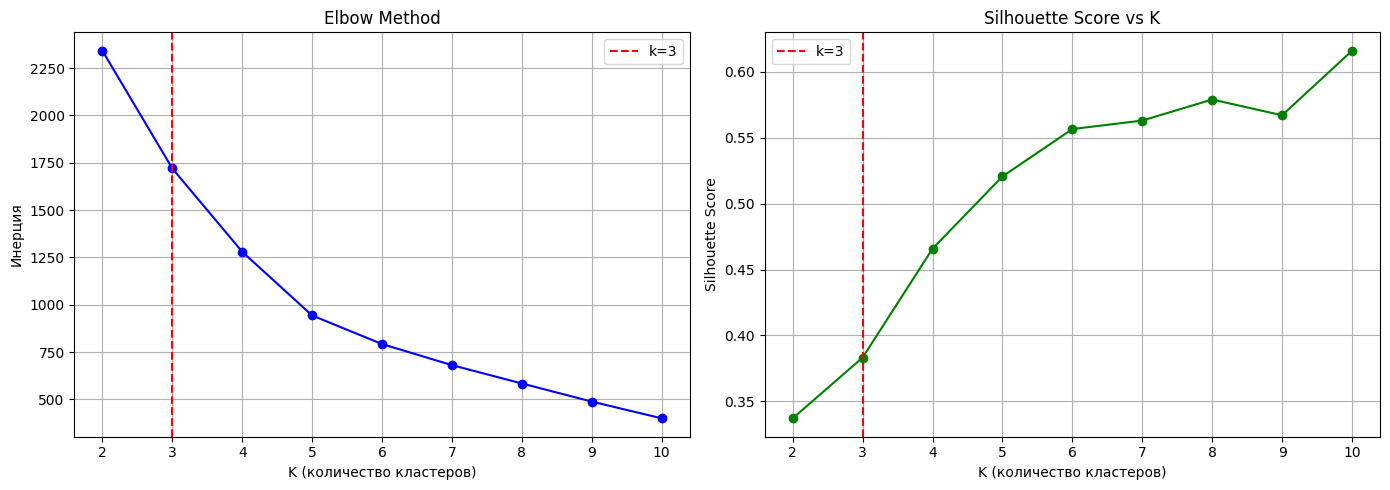

In [18]:
inertias = []
silhouettes = []
K_range = range(2, 11)

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_scaled)
    inertias.append(kmeans_temp.inertia_)
    silhouettes.append(silhouette_score(X_scaled, kmeans_temp.labels_))

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, 'bo-')
plt.axvline(x=3, color='r', linestyle='--', label='k=3')
plt.xlabel('K (количество кластеров)')
plt.ylabel('Инерция')
plt.title('Elbow Method')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouettes, 'go-')
plt.axvline(x=3, color='r', linestyle='--', label='k=3')
plt.xlabel('K (количество кластеров)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs K')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

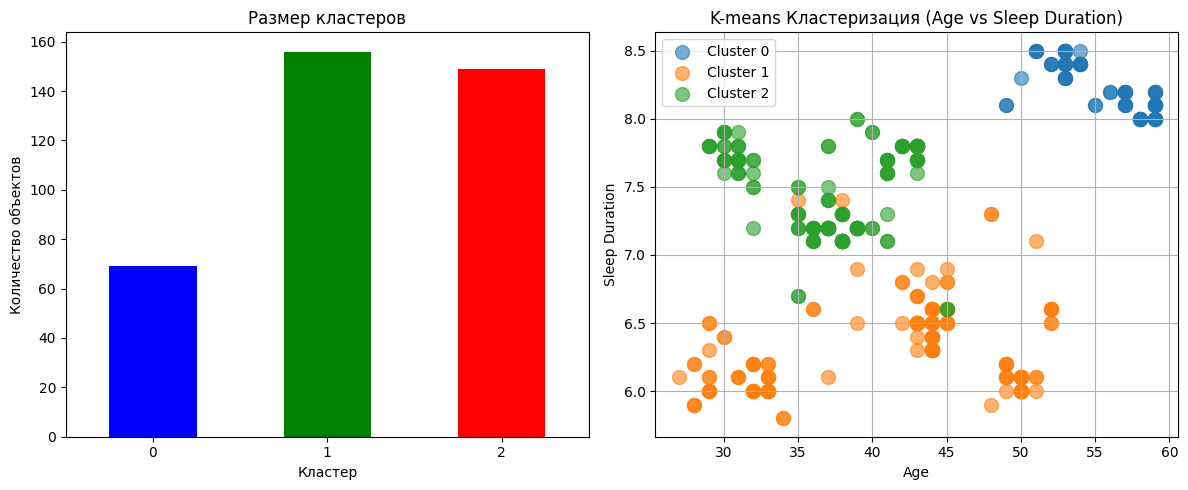

In [19]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df_not_processed['Cluster'].value_counts().sort_index().plot(kind='bar', color=['blue', 'green', 'red'])
plt.xlabel('Кластер')
plt.ylabel('Количество объектов')
plt.title('Размер кластеров')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
for cluster_id in sorted(df_not_processed['Cluster'].unique()):
    cluster_data = df_not_processed[df_not_processed['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Age'], cluster_data['Sleep Duration'],
               label=f'Cluster {cluster_id}', s=100, alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Sleep Duration')
plt.title('K-means Кластеризация (Age vs Sleep Duration)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


#K-MEANS
#Выбирает K начальных центров случайно
#Назначает каждую точку ближайшему центру (кластеру)
#Пересчитывает центры как среднее точек в каждом кластере
#Повторяет до сходимости

#Silhouette: показывает, насколько хорошо точки назначены своим кластерам (-1 до 1)
#Davies-Bouldin: средний коэффициент подобия внутри и между кластерами (меньше - лучше)
#Calinski-Harabasz: отношение между-кластерной к внутри-кластерной дисперсии (выше - лучше)

In [21]:
K_range = range(1, 11)
inertias, silhouettes, davies_bouldin, calinski_harabasz = [], [], [], []
models = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    models.append(kmeans)
    inertias.append(kmeans.inertia_)

    if k > 1:
        silhouettes.append(silhouette_score(X_scaled, labels))
        davies_bouldin.append(davies_bouldin_score(X_scaled, labels))
        calinski_harabasz.append(calinski_harabasz_score(X_scaled, labels))
    else:
        silhouettes.append(None)
        davies_bouldin.append(None)
        calinski_harabasz.append(None)

# Вычисляем локоть
diffs = np.diff(inertias)
diff_diffs = np.diff(diffs)
elbow_k = np.argmax(diff_diffs) + 2

print("\n")
print("ПОДБОР ОПТИМАЛЬНОГО КОЛИЧЕСТВА КЛАСТЕРОВ")

print("МЕТРИКИ ДЛЯ КАЖДОГО K:")
print("\n")
print(f"{'K':<3} {'Инерция':<12} {'Silhouette':<12} {'Davies-Bouldin':<15} {'Calinski-Harabasz':<15}")

for i, k in enumerate(K_range):
    sil = f"{silhouettes[i]:.4f}" if silhouettes[i] is not None else "N/A"
    db = f"{davies_bouldin[i]:.4f}" if davies_bouldin[i] is not None else "N/A"
    ch = f"{calinski_harabasz[i]:.2f}" if calinski_harabasz[i] is not None else "N/A"
    print(f"{k:<3} {inertias[i]:<12.2f} {sil:<12} {db:<15} {ch:<15}")

print(f"РЕКОМЕНДУЕМОЕ K: {elbow_k}")




ПОДБОР ОПТИМАЛЬНОГО КОЛИЧЕСТВА КЛАСТЕРОВ
МЕТРИКИ ДЛЯ КАЖДОГО K:
K   Инерция      Silhouette   Davies-Bouldin  Calinski-Harabasz


1   3366.00      N/A          N/A             N/A            
2   2341.72      0.3371       1.3954          162.71         
3   1719.86      0.3832       1.1496          177.55         
4   1279.78      0.4658       0.9191          201.05         
5   943.32       0.5206       0.8091          236.92         
6   792.35       0.5566       0.6981          239.06         
7   681.04       0.5630       0.6824          241.15         
8   584.05       0.5790       0.6475          249.05         
9   488.59       0.5670       0.6560          268.70         
10  400.04       0.6160       0.6373          299.86         
РЕКОМЕНДУЕМОЕ K: 2


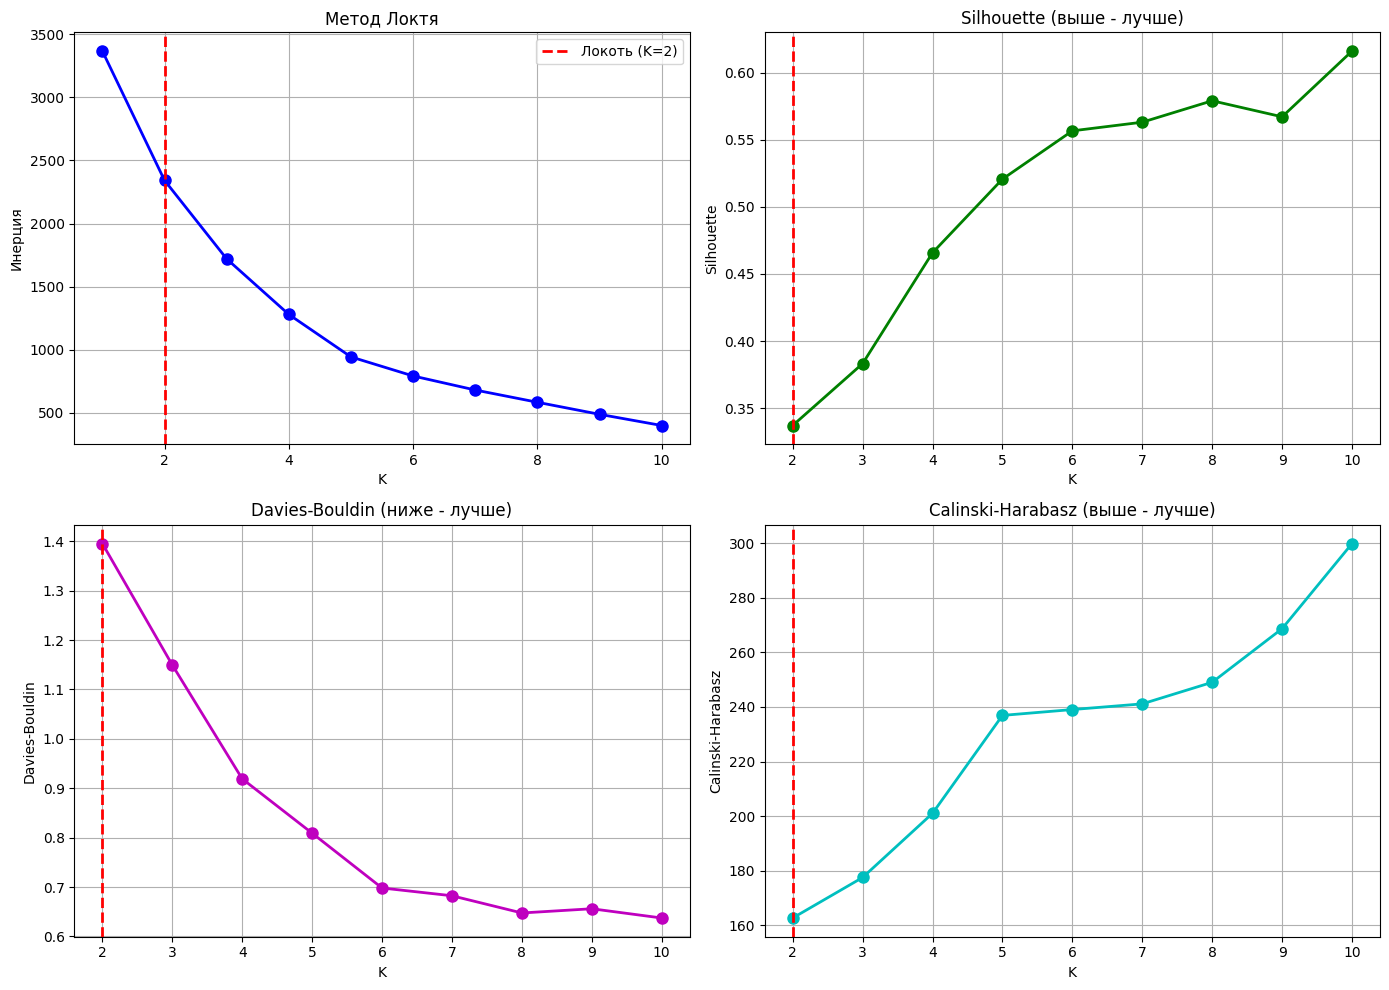

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0, 0].axvline(x=elbow_k, color='r', linestyle='--', linewidth=2, label=f'Локоть (K={elbow_k})')
axes[0, 0].set(xlabel='K', ylabel='Инерция', title='Метод Локтя')
axes[0, 0].legend(), axes[0, 0].grid()

axes[0, 1].plot(list(K_range)[1:], silhouettes[1:], 'go-', linewidth=2, markersize=8)
axes[0, 1].axvline(x=elbow_k, color='r', linestyle='--', linewidth=2)
axes[0, 1].set(xlabel='K', ylabel='Silhouette', title='Silhouette (выше - лучше)')
axes[0, 1].grid()

axes[1, 0].plot(list(K_range)[1:], davies_bouldin[1:], 'mo-', linewidth=2, markersize=8)
axes[1, 0].axvline(x=elbow_k, color='r', linestyle='--', linewidth=2)
axes[1, 0].set(xlabel='K', ylabel='Davies-Bouldin', title='Davies-Bouldin (ниже - лучше)')
axes[1, 0].grid()

axes[1, 1].plot(list(K_range)[1:], calinski_harabasz[1:], 'co-', linewidth=2, markersize=8)
axes[1, 1].axvline(x=elbow_k, color='r', linestyle='--', linewidth=2)
axes[1, 1].set(xlabel='K', ylabel='Calinski-Harabasz', title='Calinski-Harabasz (выше - лучше)')
axes[1, 1].grid()

plt.tight_layout()
plt.show()

In [24]:
optimal_kmeans = models[elbow_k - 1]
df_not_processed['Cluster'] = optimal_kmeans.fit_predict(X_scaled)


print(f"СТАТИСТИКА ДЛЯ K = {elbow_k}")

print(f"Распределение по кластерам:")
print(df_not_processed['Cluster'].value_counts().sort_index())

for cluster_id in sorted(df_not_processed['Cluster'].unique()):
    cluster_data = df_not_processed[df_not_processed['Cluster'] == cluster_id]
    print(f"\n--- Кластер {cluster_id} ({len(cluster_data)} объектов) ---")
    print(f"Age: {cluster_data['Age'].mean():.2f} ± {cluster_data['Age'].std():.2f}")
    print(f"Sleep Duration: {cluster_data['Sleep Duration'].mean():.2f} ± {cluster_data['Sleep Duration'].std():.2f}")
    print(f"Heart Rate: {cluster_data['Heart Rate'].mean():.2f} ± {cluster_data['Heart Rate'].std():.2f}")

СТАТИСТИКА ДЛЯ K = 2
Распределение по кластерам:
Cluster
0    131
1    243
Name: count, dtype: int64

--- Кластер 0 (131 объектов) ---
Age: 40.79 ± 8.02
Sleep Duration: 6.27 ± 0.31
Heart Rate: 74.02 ± 3.59

--- Кластер 1 (243 объектов) ---
Age: 42.93 ± 8.93
Sleep Duration: 7.60 ± 0.55
Heart Rate: 68.09 ± 2.66


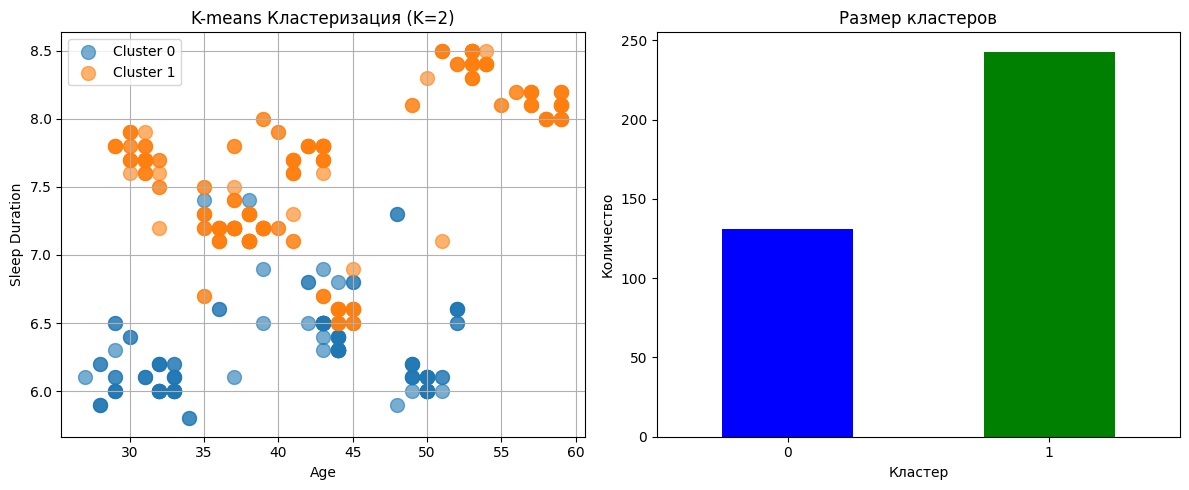


ВЫВОД
Оптимальное число кластеров: 2
Silhouette Score: 0.3371
Davies-Bouldin: 1.3954
Calinski-Harabasz: 162.71


In [25]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for i in sorted(df_not_processed['Cluster'].unique()):
    mask = df_not_processed['Cluster'] == i
    plt.scatter(df_not_processed[mask]['Age'], df_not_processed[mask]['Sleep Duration'],
               label=f'Cluster {i}', s=100, alpha=0.6)
plt.xlabel('Age'), plt.ylabel('Sleep Duration')
plt.title(f'K-means Кластеризация (K={elbow_k})')
plt.legend(), plt.grid()

plt.subplot(1, 2, 2)
df_not_processed['Cluster'].value_counts().sort_index().plot(
    kind='bar', color=['blue', 'green', 'red', 'orange'][:elbow_k])
plt.xlabel('Кластер'), plt.ylabel('Количество')
plt.title('Размер кластеров')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("ВЫВОД")
print("=" * 70)
print(f"Оптимальное число кластеров: {elbow_k}")
print(f"Silhouette Score: {silhouettes[elbow_k-1]:.4f}")
print(f"Davies-Bouldin: {davies_bouldin[elbow_k-1]:.4f}")
print(f"Calinski-Harabasz: {calinski_harabasz[elbow_k-1]:.2f}")


СТАТИСТИКА ДЛЯ K = 5
Silhouette: 0.5206
Davies-Bouldin: 0.8091
Calinski-Harabasz: 236.92

Распределение: 
Cluster_K5
0    150
1     32
2     57
3     69
4     66
Name: count, dtype: int64

--- Кластер 0 (150) ---
Age: 37.03 ± 4.35
Sleep Duration: 7.45 ± 0.32
Heart Rate: 68.97 ± 1.56

--- Кластер 1 (32) ---
Age: 49.75 ± 0.67
Sleep Duration: 6.07 ± 0.07
Heart Rate: 75.00 ± 0.00

--- Кластер 2 (57) ---
Age: 32.67 ± 3.97
Sleep Duration: 6.21 ± 0.34
Heart Rate: 74.77 ± 4.42

--- Кластер 3 (69) ---
Age: 55.28 ± 2.98
Sleep Duration: 8.25 ± 0.18
Heart Rate: 67.16 ± 3.71

--- Кластер 4 (66) ---
Age: 44.77 ± 2.72
Sleep Duration: 6.55 ± 0.22
Heart Rate: 69.71 ± 4.25


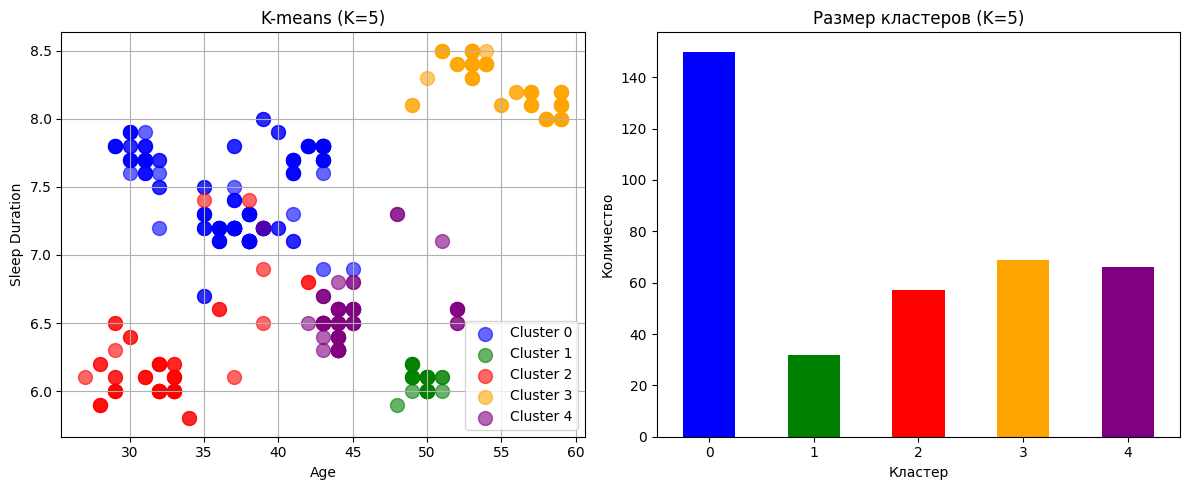


СРАВНЕНИЕ: K=2 vs K=5
Метрика                   K={}            K=5            
                          (Оптимальное)   (Альтернативное)
----------------------------------------------------------------------
Silhouette                0.3371          0.5206         
Davies-Bouldin            1.3954          0.8091         
Calinski-Harabasz         162.71          236.92         


In [26]:
####################
# ДЛЯ K=5


kmeans_k5 = KMeans(n_clusters=5, random_state=42, n_init=10)
df_not_processed['Cluster_K5'] = kmeans_k5.fit_predict(X_scaled)

sil_k5 = silhouette_score(X_scaled, df_not_processed['Cluster_K5'])
db_k5 = davies_bouldin_score(X_scaled, df_not_processed['Cluster_K5'])
ch_k5 = calinski_harabasz_score(X_scaled, df_not_processed['Cluster_K5'])

print("\n" + "=" * 70)
print("СТАТИСТИКА ДЛЯ K = 5")
print("=" * 70)
print(f"Silhouette: {sil_k5:.4f}")
print(f"Davies-Bouldin: {db_k5:.4f}")
print(f"Calinski-Harabasz: {ch_k5:.2f}")
print(f"\nРаспределение: \n{df_not_processed['Cluster_K5'].value_counts().sort_index()}")

for cluster_id in sorted(df_not_processed['Cluster_K5'].unique()):
    cluster_data = df_not_processed[df_not_processed['Cluster_K5'] == cluster_id]
    print(f"\n--- Кластер {cluster_id} ({len(cluster_data)}) ---")
    print(f"Age: {cluster_data['Age'].mean():.2f} ± {cluster_data['Age'].std():.2f}")
    print(f"Sleep Duration: {cluster_data['Sleep Duration'].mean():.2f} ± {cluster_data['Sleep Duration'].std():.2f}")
    print(f"Heart Rate: {cluster_data['Heart Rate'].mean():.2f} ± {cluster_data['Heart Rate'].std():.2f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
colors = ['blue', 'green', 'red', 'orange', 'purple']
for i in sorted(df_not_processed['Cluster_K5'].unique()):
    mask = df_not_processed['Cluster_K5'] == i
    plt.scatter(df_not_processed[mask]['Age'], df_not_processed[mask]['Sleep Duration'],
               label=f'Cluster {i}', s=100, alpha=0.6, color=colors[i])
plt.xlabel('Age'), plt.ylabel('Sleep Duration')
plt.title('K-means (K=5)')
plt.legend(), plt.grid()

plt.subplot(1, 2, 2)
df_not_processed['Cluster_K5'].value_counts().sort_index().plot(kind='bar', color=colors)
plt.xlabel('Кластер'), plt.ylabel('Количество')
plt.title('Размер кластеров (K=5)')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print(f"СРАВНЕНИЕ: K={elbow_k} vs K=5")
print("=" * 70)
print(f"{'Метрика':<25} {'K={}':<15} {'K=5':<15}")
print(f"{'':25} {'(Оптимальное)':<15} {'(Альтернативное)':<15}")
print("-" * 70)
print(f"{'Silhouette':<25} {silhouettes[elbow_k-1]:<15.4f} {sil_k5:<15.4f}")
print(f"{'Davies-Bouldin':<25} {davies_bouldin[elbow_k-1]:<15.4f} {db_k5:<15.4f}")
print(f"{'Calinski-Harabasz':<25} {calinski_harabasz[elbow_k-1]:<15.2f} {ch_k5:<15.2f}")


#K-MEANS
#Выбирает K начальных центров случайно
#Назначает каждую точку ближайшему центру (кластеру)
#Пересчитывает центры как среднее точек в каждом кластере
#Повторяет до сходимости

#Silhouette: показывает, насколько хорошо точки назначены своим кластерам (-1 до 1)
#Davies-Bouldin: средний коэффициент подобия внутри и между кластерами (меньше - лучше)
#Calinski-Harabasz: отношение между-кластерной к внутри-кластерной дисперсии (выше - лучше)

ПРИМЕРЫ КОДА

In [ ]:
df = pd.read_csv('YOUR_FILE')

In [ ]:
df.column = df.column.astype('category') # процессим категориальные признаки

In [ ]:
category_columns: list[str] = df.select_dtypes(include=['category']).columns # собираем колонки помеченные как category

# Применяем One-Hot Encoding
df = pd.get_dummies(df, columns=category_columns, drop_first=True)

In [ ]:
df_not_processed = df.copy() # датасет для анализа

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Выбираем числовые признаки
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler() or StandardScaler()

# Применяем нормализацию
df[numeric_features] = scaler.fit_transform(df[numeric_features])
